### Integer Programming

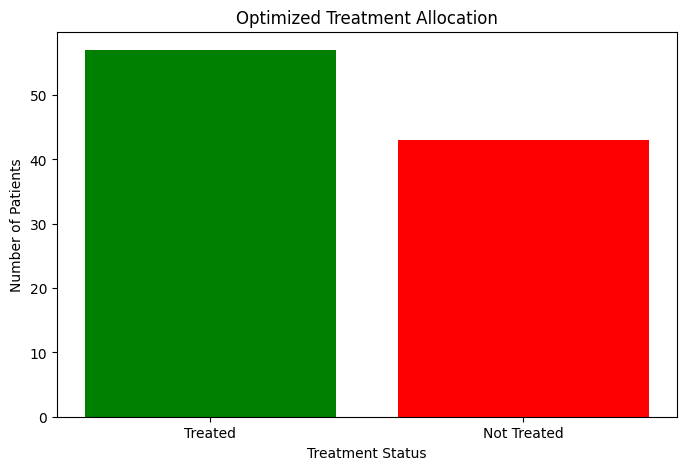

In [ ]:
import pandas as pd
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("../Datasets/updated_patient_treatment_data.csv")

# Convert 'Treated' column to binary (1 for Yes, 0 for No)
data['Treated'] = data['Treated'].apply(lambda x: 1 if x == 'Yes' else 0)

# Define the objective function (maximize treated patients)
c = -data['Treated'].values  # Use negative for maximization in linprog

# Define constraints (Pain, Urgency, Frequency)
A = np.array([
    data['Pain_Score'].values,      
    data['Urgency_Score'].values,   
    data['Frequency_Score'].values  
])

b = [500, 500, 500]  

# Define bounds for decision variables (0 or 1)
x_bounds = [(0, 1) for _ in range(len(data))]

# Solve integer programming problem using linear programming relaxation
res = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs')

# Convert the solution to integer values
solution = np.round(res.x)

# Assign solution to dataframe
data['Optimized_Treatment'] = solution

# Count treated and non-treated patients in optimized solution
treated_count = int(data['Optimized_Treatment'].sum())
non_treated_count = len(data) - treated_count

# Create a bar chart for visualization
plt.figure(figsize=(8, 5))
plt.bar(['Treated', 'Not Treated'], [treated_count, non_treated_count], color=['green', 'red'])
plt.xlabel("Treatment Status")
plt.ylabel("Number of Patients")
plt.title("Optimized Treatment Allocation")
plt.show()
